# Übung 2 
Autoren: David Kittel, Berhard Mair, Karel Rusy, Lukas Windsteig

In [1]:
# Import von Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# 1.1 Barwertberechnung

In [2]:
#extra funktion für barwert berechnung und plot 
def Barwert(zinssatz, systemkosten_kWp, betriebskosten_kWp, lebensdauer, anschlussleistung, zuschuss_kWp, pv_einspeisung, preise_at, titel):
    
    tmp_summe = 0
    barwert_einzelwert = np.empty((lebensdauer,))
    barwert_pro_a = np.empty((lebensdauer + 1,))
    
    einspeisung_anlage = anschlussleistung * pv_einspeisung #kWh
    
    umsatz_pro_a = np.round((np.sum(einspeisung_anlage.squeeze() * preise_at))/100, 2) #€/a
    
    for i in range(lebensdauer):
        tmp = (umsatz_pro_a - (betriebskosten_kWp * anschlussleistung)) / ((1 + zinssatz) ** (i + 1)) 
        barwert_einzelwert[i] = tmp
        tmp_summe += barwert_einzelwert[i]
        barwert_pro_a[0] = -((systemkosten_kWp - zuschuss_kWp) * anschlussleistung)
        barwert_pro_a[i + 1] = -((systemkosten_kWp - zuschuss_kWp) * anschlussleistung) + tmp_summe

        
    netto_barwert = -((systemkosten_kWp - zuschuss_kWp) * anschlussleistung) + np.sum(barwert_einzelwert)
    
    print("Nettobarwert " + titel + ": ", round(netto_barwert, 2), "€")
    
    print("Maximale Investitionskosten: ", np.round(np.sum(barwert_einzelwert) + (zuschuss_kWp * anschlussleistung)), "€\n")
    
    Barwert_plot(barwert_pro_a, lebensdauer, "Entwicklung des Barwerts " + titel)  

# 1.2 Barwertberechung mit OeMAG-Förderung

In [3]:
def Barwert_oemag(zinssatz, systemkosten_kWp, betriebskosten_kWp, lebensdauer, anschlussleistung, zuschuss_kWp, pv_einspeisung, preise_at, einspeisetarif, foerderdauer, titel):

    tmp_summe = 0
    barwert_einzelwert = np.empty((lebensdauer,))
    barwert_pro_a = np.empty((lebensdauer + 1,))
    
    einspeisung_anlage = anschlussleistung * pv_einspeisung #kWh
    
    umsatz_pro_a = (np.sum(einspeisung_anlage.squeeze() * preise_at))/100 #€/a
    
    umsatz_foerderung = (np.sum(einspeisung_anlage) * einspeisetarif)/100 #€/a
    
    for i in range(lebensdauer):
        if(i < foerderdauer):
            umsatz = umsatz_foerderung
        else:
            umsatz = umsatz_pro_a
        
        tmp = (umsatz - (betriebskosten_kWp * anschlussleistung)) / ((1 + zinssatz) ** (i + 1)) 
        barwert_einzelwert[i] = tmp
        tmp_summe += barwert_einzelwert[i]
        barwert_pro_a[0] = -((systemkosten_kWp - zuschuss_kWp) * anschlussleistung)
        barwert_pro_a[i + 1] = -((systemkosten_kWp - zuschuss_kWp) * anschlussleistung) + tmp_summe

        
    netto_barwert = -((systemkosten_kWp - zuschuss_kWp) * anschlussleistung) + np.sum(barwert_einzelwert)
    
    print("Nettobarwert mit OeMAG Förderung, danach " + titel + ": ", round(netto_barwert, 2), "€")
    
    print("Maximale Investitionskosten mit OeMAG Förderung: ", np.round(np.sum(barwert_einzelwert) + (zuschuss_kWp * anschlussleistung)), "€\n")
    
    Barwert_plot(barwert_pro_a, lebensdauer, "Entwicklung des Barwerts (mit 13 Jahren OeMAG Förderung ), danach" + titel)  

In [4]:
def Barwert_plot(barwert_pro_a, lebensdauer, titel):
    plt.figure()
    plt.bar(np.arange(0, lebensdauer + 1, 1), barwert_pro_a)
    plt.title(titel)
    plt.xlabel("Lebensdauer [Jahren]")
    plt.ylabel("Barwert [€]")
    plt.grid()
    plt.show

# 1.3 Anwendung der Barwertberechnungen

Nettobarwert (Preise aus 2021):  2133.29 €
Maximale Investitionskosten:  14133.0 €

Nettobarwert mit OeMAG Förderung, danach (Preise aus 2021):  7290.51 €
Maximale Investitionskosten mit OeMAG Förderung:  19291.0 €

Nettobarwert (Preise aus 2022):  28974.21 €
Maximale Investitionskosten:  40974.0 €



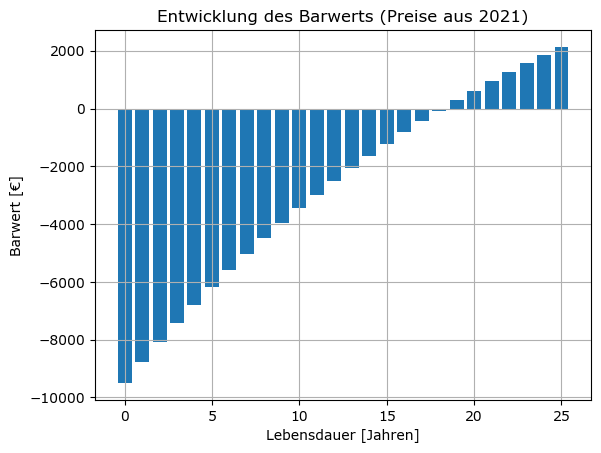

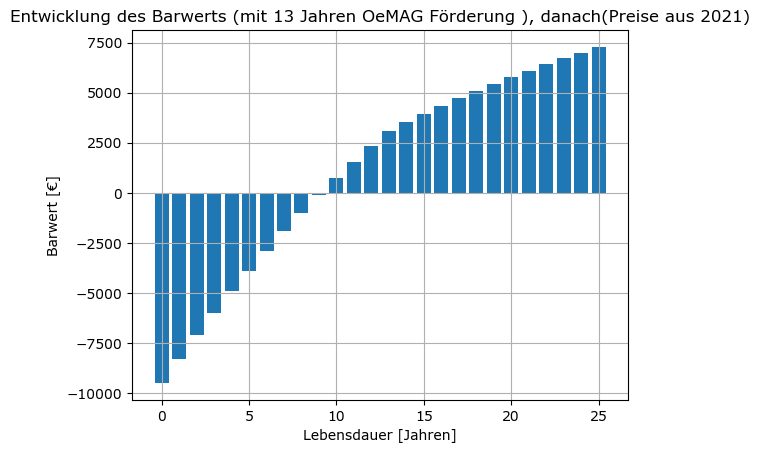

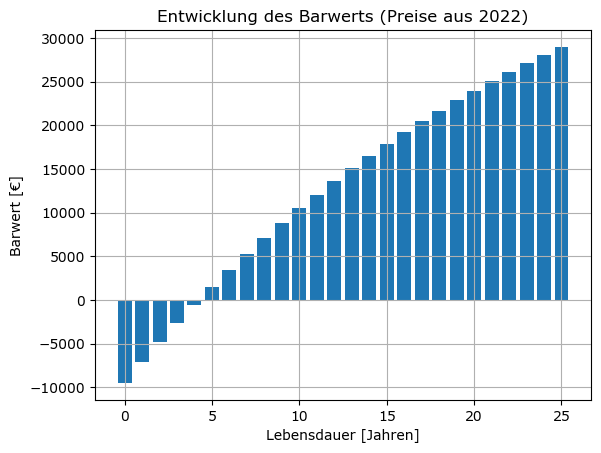

In [5]:
zinssatz = 0.04 #%
systemkosten_kWp = 1200 #€/kWp
betriebskosten_kWp = 4 #€/(kWp*a)
lebensdauer = 25 #a
anschlussleistung = 10 #kWp
zuschuss_kWp = min(250, systemkosten_kWp * 0.3)
einspeisetarif = 14.457 #ct/kWh
foerderdauer = 13 #a
     
preise21 = pd.read_csv("ENTSOE_prices_for_2021_in_ct_per_kWh.csv")
preise22 = pd.read_csv("ENTSOE_prices_for_2022_in_ct_per_kWh.csv")
pv_einspeisung = pd.read_csv("PV_Einspeisung.csv", header = None) #% des kWp werts
preise_at_21 = preise21.loc[0: , "AT"] #ct/kWh
preise_at_22 = preise22.loc[0:, "AT"] #ct/kWh
    
    
Barwert(zinssatz, systemkosten_kWp, betriebskosten_kWp, lebensdauer, anschlussleistung, zuschuss_kWp, pv_einspeisung, preise_at_21, "(Preise aus 2021)")
Barwert_oemag(zinssatz, systemkosten_kWp, betriebskosten_kWp, lebensdauer, anschlussleistung, zuschuss_kWp, pv_einspeisung, preise_at_21, einspeisetarif, foerderdauer, "(Preise aus 2021)")
Barwert(zinssatz, systemkosten_kWp, betriebskosten_kWp, lebensdauer, anschlussleistung, zuschuss_kWp, pv_einspeisung, preise_at_22, "(Preise aus 2022)")

Aus den oben angeführten Zahlen und Diagrammen geht hervor, dass eine 10kWp Anlage sich nach etwa 19 Jahren amortisiert hat, wenn davon ausgegangen wird das der Einspeisetarif konstant wie im Jahr 2021 ist. Mit einer Förderung der OeMAG verbucht die Anlage schon nach 10 Jahren einen Positiven Barwert. Wenn von einem Einspeisetarif über den gesamten Zeitraum wie im Jahr 2022 ausgegangen werden kann dann würde der Barwert schon nach 5 Jahren positv werden. 

# 2.1 Eigenverbrauch- und Überschussberechung

In [6]:
def Eigenverbrauch_uberschuss(PV_profil_leistung, leistung_haushalte, PV_kWp):
    Eigenverbrauch = np.zeros(35040)
    uberschusseinspeisung = np.zeros(35040)

    PV_profil_leistung = PV_profil_leistung * PV_kWp * 1000
    for i in range(len(PV_profil_leistung)):
        if(PV_profil_leistung[i]<=leistung_haushalte[i]):
            Eigenverbrauch[i] = PV_profil_leistung[i]
            uberschusseinspeisung[i] = 0
        else:
            Eigenverbrauch[i] = leistung_haushalte[i]
            uberschusseinspeisung[i] = PV_profil_leistung[i]-leistung_haushalte[i]
    
    return Eigenverbrauch, uberschusseinspeisung

In [7]:
def plot_Eigenverbrauchsanteil_Deckungsgrad(PV_profil_leistung_data, leistung_haushalt, kWp_max):
    eigenverbraucheinteil = np.zeros(kWp_max)
    deckungsgrad = np.zeros(kWp_max)
    eigenverbrauche = np.zeros(kWp_max)
    sum_of_haushalte_leistung = 0
    
    for j in range(len(leistung_haushalt)):
        if PV_profil_leistung_data[j] != 0:
            sum_of_haushalte_leistung = sum_of_haushalte_leistung + leistung_haushalt[j]

    for i in range(kWp_max):
        if i == 0:
            continue
        eigenverbrauch,uberschuss  = Eigenverbrauch_uberschuss(PV_profil_leistung_data,leistung_haushalt,i)
        eigenverbrauche[i] = np.sum(eigenverbrauch)
    for i in range(kWp_max):
        sum_of_pv_energy = np.sum(PV_profil_leistung_data*1000*i)
        deckungsgrad[i] = eigenverbrauche[i]/(sum_of_haushalte_leistung)
        if i != 0:
            eigenverbraucheinteil[i] = eigenverbrauche[i]/(sum_of_pv_energy)
        else:
            eigenverbraucheinteil[i] = None
    plt.plot(eigenverbraucheinteil*100, label = "Eigenverbrauchsanteil")
    plt.plot(deckungsgrad*100, label = "Deckungsgrad")
    plt.xlabel("Anlagegröße [kWp]")
    plt.ylabel("Prozent")
    plt.xticks(np.arange(0,kWp_max,1))
    plt.grid(axis='y', linestyle='-')
    plt.grid(axis='x', linestyle='-')
    plt.legend()
    plt.show()

In [8]:
def plot_Eigenverbrauch_uberschuss(PV_profil_leistung_data,leistung_haushalte_spalte):
    eigenverbrauch, uberschuss = Eigenverbrauch_uberschuss(PV_profil_leistung_data, leistung_haushalte_spalte, 5)
    eigenverbrauch = pd.DataFrame(eigenverbrauch)
    uberschuss = pd.DataFrame(uberschuss)
    PV_profil_leistung_data_week3 = PV_profil_leistung_data.iloc[1345:2017].values.reshape(-1)
    PV_profil_leistung_data_week25 = PV_profil_leistung_data.iloc[16128:16801].values.reshape(-1)
    eigenverbrauch_week3 = eigenverbrauch.iloc[1345:2017].values.reshape(-1)
    eigenverbrauch_week25 = eigenverbrauch.iloc[16128:16801].values.reshape(-1)
    leisung_week3 = leistung_haushalte_spalte.iloc[1345:2017].values.reshape(-1)
    leistung_week25 = leistung_haushalte_spalte.iloc[16128:16801].values.reshape(-1)
    
    df = pd.DataFrame({
    'PV_Leistung': PV_profil_leistung_data_week3*1000*5,
    'Haushalt_Leistung': leisung_week3,
    'Eigenverbrauch': eigenverbrauch_week3,
    }, index=list(range(1345, 2017))
    )
    df2 = pd.DataFrame({
    'PV_Leistung': PV_profil_leistung_data_week25*1000*5,
    'Haushalt_Leistung': leistung_week25,
    'Eigenverbrauch': eigenverbrauch_week25,
    }, index=list(range(16128, 16801))
    )
    
    ax = df.plot.area(stacked=False,figsize=(12, 6))
    ax.set_xlabel('Woche 3', fontsize=14)
    ax.set_ylabel('Leistung (W)', fontsize=14)
    ax2 = df2.plot.area(stacked=False,figsize=(12, 6))
    ax2.set_xlabel('Woche 25', fontsize=14)
    ax2.set_ylabel('Leistung (W)', fontsize=14)


# 2.2 Anwendung der Überschuss- und Eigenverbrauchberechnung

In [9]:
# PV Leistung einlesen - Einheit kW/kWp
data_PV_leistung = pd.read_csv('PV_Profil_leistung_2.csv', header = None)
PV_profil_leistung_data = data_PV_leistung.iloc[:, 0]

# Leistung Haushalte einlesen - Einheit Wh/4
data_leistung_haushalte = pd.read_csv('LeistungHaushalte.csv', header = None)

# Leistung der Haushalte in Wh
leistung_haushalte_spalte1 = data_leistung_haushalte.iloc[:, 0] * 4
leistung_haushalte_spalte2 = data_leistung_haushalte.iloc[:, 1] * 4

# Eigenverbrauch und Überschuss für Haushalt 1 und 2 berechnen (5 kWp)
eigenverbrauch1, uberschuss1 = Eigenverbrauch_uberschuss(PV_profil_leistung_data, leistung_haushalte_spalte1, 5)
eigenverbrauch2, uberschuss2 = Eigenverbrauch_uberschuss(PV_profil_leistung_data,leistung_haushalte_spalte2, 5)

print("Haushalt 1:")
print(f"Eigenverbrauch: {np.round(np.sum(eigenverbrauch1) / 1000,2) } kWh")
print(f"Überschuss: {np.round(np.sum(uberschuss1) / 1000, 2)} kWh")
print("Haushalt 2:")
print(f"Eigenverbrauch: {np.round(np.sum(eigenverbrauch2) / 1000, 2)} kWh")
print(f"Überschuss: {np.round(np.sum(uberschuss2) / 1000, 2) } kWh")

Haushalt 1:
Eigenverbrauch: 9150.07 kWh
Überschuss: 9872.41 kWh
Haushalt 2:
Eigenverbrauch: 7498.56 kWh
Überschuss: 11523.92 kWh


Zahlen zum Eigenverbrauch und Überschuss der Haushalte aus Spalte 1 und 2 

# 2.3 Entwicklung des Eigenverbrauchsanteils und Deckungsgrade (0-20 kWp)

Haushalt 1:


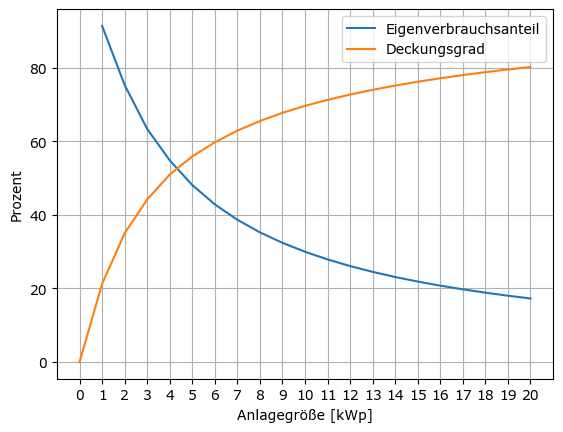

Haushalt 2:


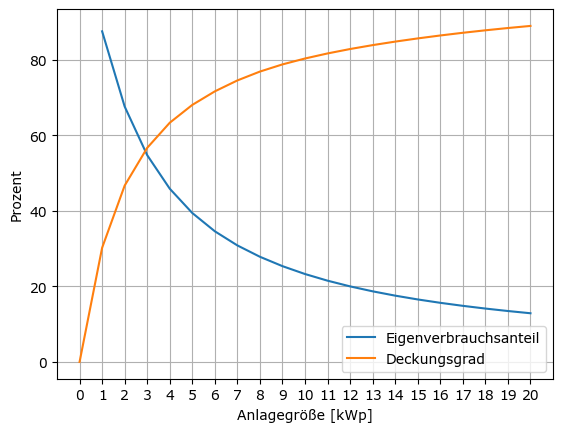

In [10]:
kWp_max = 21
# Plot Eigenverbrauchsanteil and Deckungsgrad for Haushalt 1 and 2
print("Haushalt 1:")
plot_Eigenverbrauchsanteil_Deckungsgrad(PV_profil_leistung_data,leistung_haushalte_spalte1,kWp_max)
print("Haushalt 2:")
plot_Eigenverbrauchsanteil_Deckungsgrad(PV_profil_leistung_data, leistung_haushalte_spalte2, kWp_max)

Hier wurde der Eigenverbrauchsanteil im Vergleich zum Deckungsrad für Anlagen zwischen 0 und 20 kWp geplotet 

# 2.4 Grafik für Erzeugung, Last und Eigenverbrauch

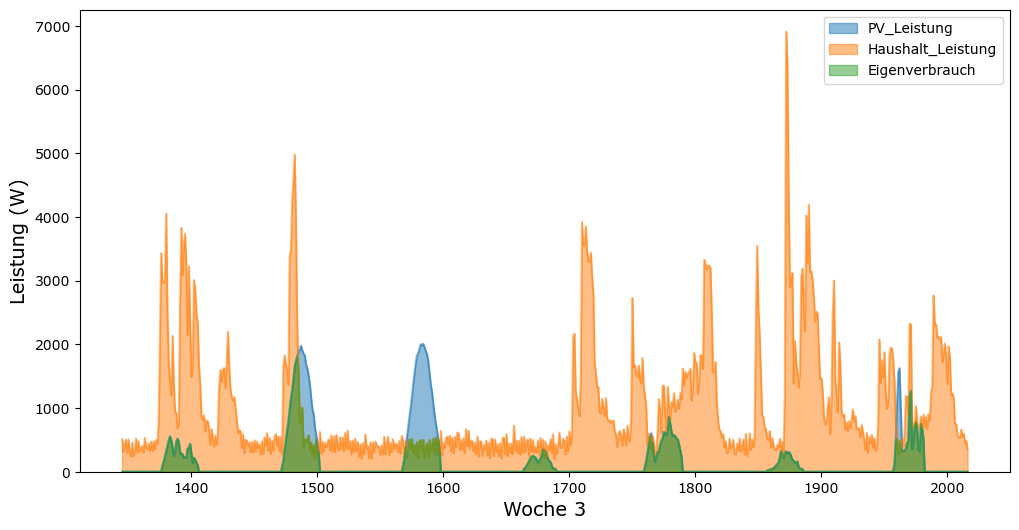

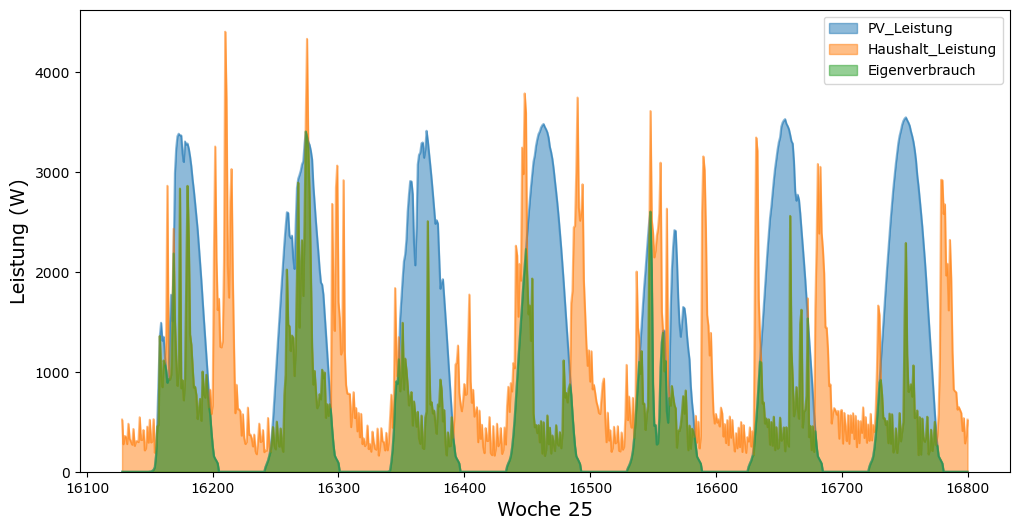

In [11]:
# Plot PV_Leistung, Haushaltleistung and Eigenverbrauch for week 3 and 25
plot_Eigenverbrauch_uberschuss(PV_profil_leistung_data,leistung_haushalte_spalte1)

In den Diagrammen ist gut zu erkennen, dass die PV erzeugung in den Wintermonaten viel geringer als in den Sommermonaten ist. Außerdem sieht man, dass die Verbrauchsspitzen meist gegen Früh und Abend auftreten, im Vergleich dazu die Erzeugung zu Mittag am höchsten ist, dieses Problem könnte zum Beispiel mit einem PV-Speicher abgefedert werden. 

# 3.1 Barwertberechung für Haushalte aus Punkt 2

In [12]:
def Verbrauche(pv_leistung_anlage_kWh, leistung_kWh):
    
    eigenverbrauch = 0
    ueberschuss = 0
    mehr_verbrauch = 0

    for i in range(len(leistung_kWh)):
        val = pv_leistung_anlage_kWh[i] - leistung_kWh[i]
        if(val <= 0):
            eigenverbrauch += pv_leistung_anlage_kWh[i]
            mehr_verbrauch += np.abs(val)
        else:
            ueberschuss += val
            eigenverbrauch += leistung_kWh[i]
        
    return eigenverbrauch, ueberschuss, mehr_verbrauch      

In [13]:
def BarwertHaushalte(eigenverbrauch, ueberschuss, mehr_verbrauch, betriebskosten_kWp, anschlussleistung, zinssatz, zuschuss_kWp, systemkosten_kWp, titel, ohne_PV ):
    einspeisetarif_ueberschuss = 7/100 #€/kWh
    strompreis_durchschnitt = 23.065/100 #€/kWh lt. statista
    tmp_summe = 0
    barwert_einzelwert = np.empty((lebensdauer,))
    barwert_pro_a = np.empty((lebensdauer + 1,))
    
    if(ohne_PV == 1):
        ausgaben = (eigenverbrauch + mehr_verbrauch) * strompreis_durchschnitt #€/a
        einnahmen = 0
    else:
        einnahmen = ueberschuss * einspeisetarif_ueberschuss
        ausgaben = mehr_verbrauch * strompreis_durchschnitt
        
        
    for i in range(lebensdauer):
        tmp = (einnahmen - ((betriebskosten_kWp * anschlussleistung) + ausgaben)) / ((1 + zinssatz) ** (i + 1)) 
        barwert_einzelwert[i] = tmp
        tmp_summe += barwert_einzelwert[i]
        barwert_pro_a[0] = -((systemkosten_kWp - zuschuss_kWp) * anschlussleistung)
        barwert_pro_a[i + 1] = -((systemkosten_kWp - zuschuss_kWp) * anschlussleistung) + tmp_summe

        
    netto_barwert = -((systemkosten_kWp - zuschuss_kWp) * anschlussleistung) + np.sum(barwert_einzelwert)
    print("Nettobarwert " + titel + ": ", round(netto_barwert,2), " €")
    Barwert_plot(barwert_pro_a, lebensdauer, "Barwertentwicklung " + titel)
    
    if(ohne_PV == 0):
        print("Maximale Investitionskosten: ", np.round(np.abs((eigenverbrauch + mehr_verbrauch) * strompreis_durchschnitt) * 25 + netto_barwert, 2) , "€\n")


Nettobarwert (Haushalt1 mit PV):  -29028.64  €
Maximale Investitionskosten:  18732.6 €

Nettobarwert (Haushalt2 mit PV):  -20391.51  €
Maximale Investitionskosten:  11889.52 €

Nettobarwert (Haushalt1 ohne PV):  -47761.24  €
Nettobarwert (Haushalt2 ohne PV):  -32281.04  €


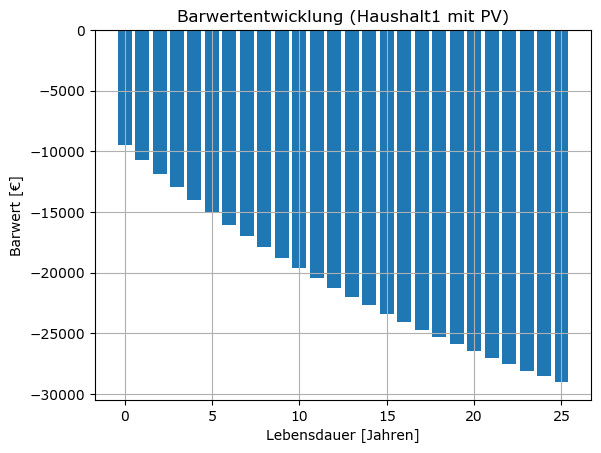

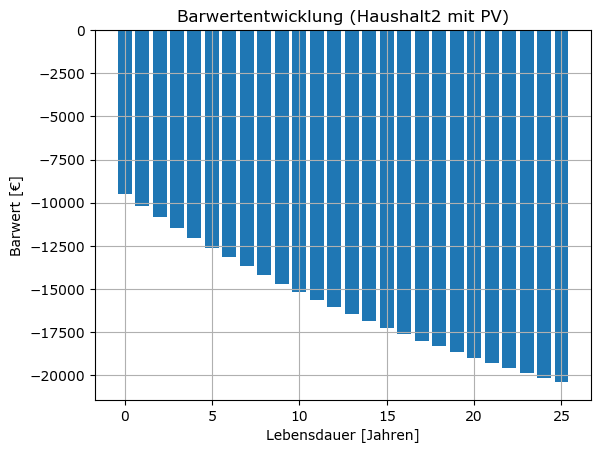

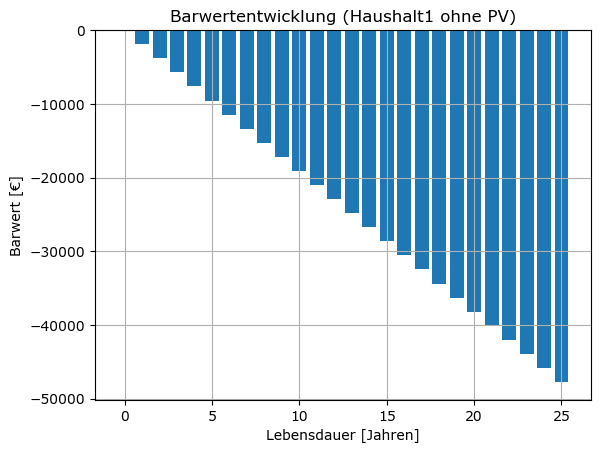

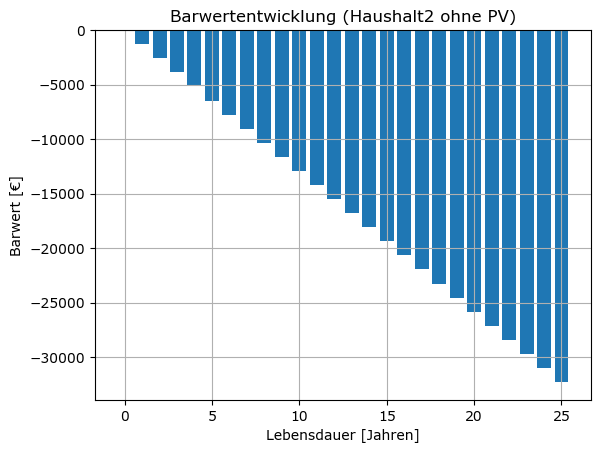

In [14]:
leistung = pd.read_csv("LeistungHaushalte.csv", header = None)
leistung_1 = leistung.iloc[:, 0]
leistung_2 = leistung.iloc[:, 1]

pv_leistung = pd.read_csv("PV_Profil_leistung_2.csv", header = None)
pv_leistung_anlage = pv_leistung * 5 

leistung_1_kWh = leistung_1 / 1000
leistung_2_kWh = leistung_2 / 1000

pv_leistung_anlage_kWh = pv_leistung_anlage.squeeze() / 4

eigenverbrauch_1, ueberschuss_1, mehr_verbrauch_1 = Verbrauche(pv_leistung_anlage_kWh, leistung_1_kWh)
eigenverbrauch_2, ueberschuss_2, mehr_verbrauch_2 = Verbrauche(pv_leistung_anlage_kWh, leistung_2_kWh)

BarwertHaushalte(eigenverbrauch_1, ueberschuss_1, mehr_verbrauch_1, betriebskosten_kWp, anschlussleistung, zinssatz, zuschuss_kWp, systemkosten_kWp, "(Haushalt1 mit PV)", 0)
BarwertHaushalte(eigenverbrauch_2, ueberschuss_2, mehr_verbrauch_2, betriebskosten_kWp, anschlussleistung, zinssatz, zuschuss_kWp, systemkosten_kWp, "(Haushalt2 mit PV)", 0)
BarwertHaushalte(eigenverbrauch_1, ueberschuss_1, mehr_verbrauch_1, 0, 0, 0, 0, 0, "(Haushalt1 ohne PV)", 1)
BarwertHaushalte(eigenverbrauch_2, ueberschuss_2, mehr_verbrauch_2, 0, 0, 0, 0, 0, "(Haushalt2 ohne PV)", 1)


Aus den Werten und Diagrammen kann man sehen, dass eine PV-Anlage bei den aktuell hohen Stromkosten auf längere frist zwar eine Ersparnis mit sich bringt, diese aber wiederum stark vom Einspeisetarif und den tatsächlichen Stromkosten abhängig ist. Die maximalen Investitionskosten beziehen sich hier nicht auf einen positiven Barwert, sondern die maximalen Investitionskosten, um am ende der Laufzeit eine Ersparnis im Vergleich zu dem Modell ohne PV-Anlage zu erhalten. 

# 4.1 Erkenntnisse 

Die Wirtschaftlichkeit von PV-Anlagen in Österreich ist stark von der höhe der Förderungen abhängig. Außerdem spielt der Einspeisetarif eine große Rolle. Aus den Übungen 2 und 3 ist zu erkennen, dass eine PV-Anlage mit Akkuspeicher im Haus einen großen Vorteil bieten kann, da die untertags erzeugte Energie in der Früh und am Abend genutzt werden kann, um den Eigenverbrauch zu decken. Dadurch ist es nicht, bzw. in einem kleineren Maße, notwendig Strom teuer aus dem Netz zu beziehen. Die Ersparnisse die man durch eine PV-Anlage ohne Speicher erlangen kann sind zwar geringer aber trotzdem deutlich merkbar. Sollte PV-Module in zukunft billiger, oder stärker gefördert werden ist die Anschaffung einer solchen Anlage auf jedenfall eine Überlegung wert. 

Unserer Meinung nach kann man nicht genau sagen, ob die Förderung von PV-Anlagen weiter bestehen, bzw. ausgebaut werden sollte. Dies liegt daran, dass auf der einen Seite PV-Anlagen eine wichtige Rolle im hinblick auf die Energiewende spielen könnten und durch ihre Unterstützung ein Schritt in die richtige Richtung getan werden kann. Außerdem können PV-Anlagen für Privatpersonen, auf lange frist gesehen, gerade bei den Entwicklungen der Stromkosten in den letzten Monaten, eine Ersparniss bringen. Auf der anderen Seite bringt die Entstehung vieler klein Kraftwerke eine große Herausforderung für das Energiesystem Österreich mit sich, wodurch wiederum kosten auf anderer Ebene entstehen. Zusätzlich sinken seit Jahren die Preise der PV-Module sowieso, wodurch PV-Anlagen auch ohne Förderung in Zukunft rentabel werden könnten. 